In [62]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [63]:
!pip install tensorflow

In [64]:
tf.__version__

'2.8.0'

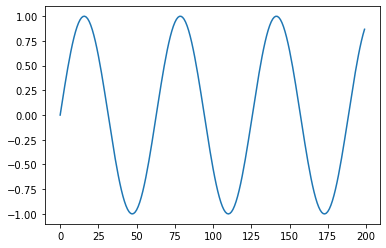

In [65]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

## Build a dataset

In [66]:
T = 10
X = []
Y = []

In [67]:
for t in range(len(series) - T) :
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [68]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [69]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

In [71]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data:검증 데이터 
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 35ms/step - loss: 0.5028 - val_loss: 0.2940
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.2011 - val_loss: 0.1190
Epoch 3/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0940 - val_loss: 0.0111
Epoch 4/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0244 - val_loss: 0.0313
Epoch 5/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0378 - val_loss: 0.0413
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0586 - val_loss: 0.0563
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0478 - val_loss: 0.0654
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0387 - val_loss: 0.0167
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.0131
Epoch 10/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 11/80
3/3 [==============

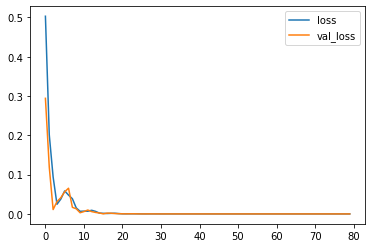

In [72]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## "Wrong" forecast using true targets

In [73]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

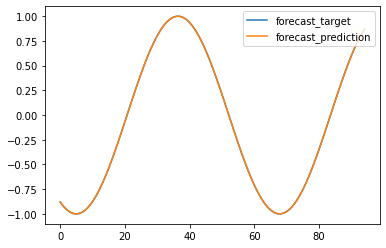

In [74]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()
validation_target = Y[-N//2:]
validation_predictions = []


In [75]:
# last train input 
last_x = X[-N//2]
print(len(validation_target))
print(last_x)
print(last_x.reshape(1, -1))
print(model.predict(last_x.reshape(1, -1))[0,0])

95
[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]
[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]
-0.8796938


In [76]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

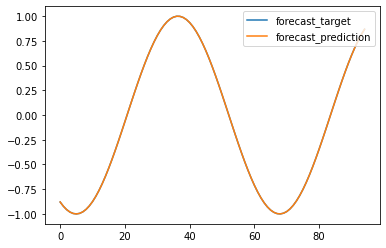

In [77]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

## Noise examples

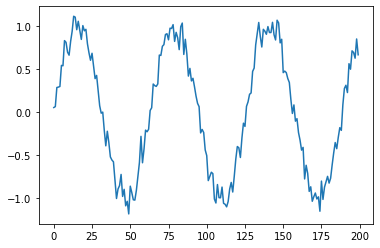

In [95]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

## Build a dataset

In [96]:
T = 10
X = []
Y = []

In [97]:
for t in range(len(series) - T) :
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [98]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [99]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

In [101]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data:검증 데이터 
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 48ms/step - loss: 1.1083 - val_loss: 0.1754
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.5182 - val_loss: 0.6248
Epoch 3/80
3/3 [==============================] - 0s 9ms/step - loss: 0.4658 - val_loss: 0.0685
Epoch 4/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0844 - val_loss: 0.1754
Epoch 5/80
3/3 [==============================] - 0s 10ms/step - loss: 0.2778 - val_loss: 0.1630
Epoch 6/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1190 - val_loss: 0.0244
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0528 - val_loss: 0.1196
Epoch 8/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1259 - val_loss: 0.0690
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0476 - val_loss: 0.0288
Epoch 10/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0488 - val_loss: 0.0743
Epoch 11/80
3/3 [=============

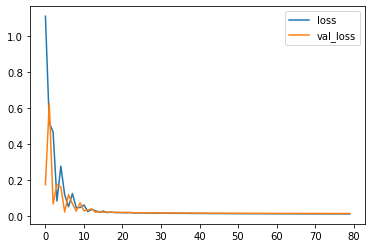

In [102]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## "Wrong" forecast using true targets

In [103]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

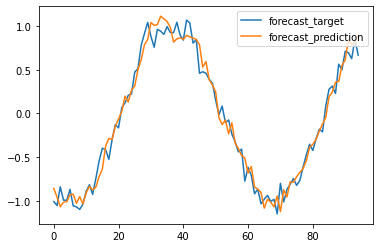

In [104]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()
validation_target = Y[-N//2:]
validation_predictions = []


In [105]:
# last train input 
last_x = X[-N//2]
print(len(validation_target))
print(last_x)
print(last_x.reshape(1, -1))
print(model.predict(last_x.reshape(1, -1))[0,0])

95
[ 0.06508496 -0.23949512 -0.19956014 -0.23434864 -0.43707002 -0.50284762
 -0.79254697 -0.74339322 -0.69563308 -0.71146107]
[[ 0.06508496 -0.23949512 -0.19956014 -0.23434864 -0.43707002 -0.50284762
  -0.79254697 -0.74339322 -0.69563308 -0.71146107]]
-0.8566743


In [106]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

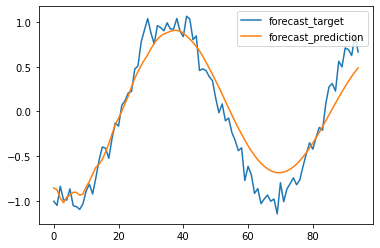

In [107]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [ ]:
# 데이터가 갖고 있는 특성만 기억함
# ANN 은 위치만 기억한.